In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

**Ejercicio 1**

In [19]:
A=np.array([[2,-1],[1,2],[1,1]])
b=np.array([2,1,4])

In [20]:
def solucion_sis(A,b):
    A_T = A.T

    A_AT = np.dot(A_T, A)
    AT_b = np.dot(A_T, b)

    return np.linalg.solve(A_AT, AT_b)

solution=solucion_sis(A,b)

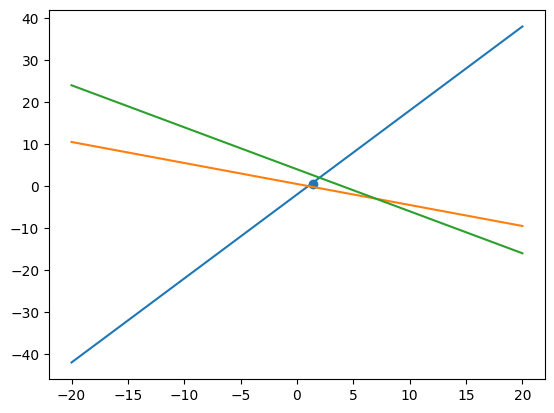

In [21]:
x=np.linspace(-20,20)
y1=2*x-2
y2=(1-x)/2
y3=4-x
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.scatter(solution[0],solution[1])

Se interpreta que el sistema no posee solución puesto que no existe el punto donde las tres rectas se intersecten como se muestra en la gráfica

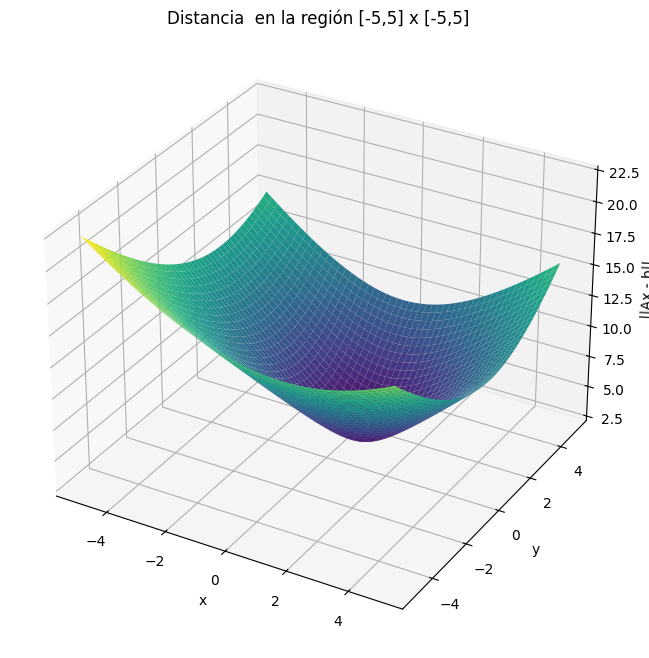

In [22]:
x=np.arange(-5,5,0.01)
y=np.arange(-5,5,0.01)
X, Y = np.meshgrid(x, y)

distancia = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        v = np.array([x[i], y[j]])
        d = np.abs(np.dot(A, v) - b)
        distancia[i, j] = np.linalg.norm(d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, distancia, cmap='viridis')

ax.set_title('Distancia  en la región [-5,5] x [-5,5]')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('||Ax - b||')

plt.show()

**Ejercicio 2**

In [23]:
Minimos="MinimosLineal.txt"
df_Minimos = pd.read_csv(Minimos, sep=" ", header=None)
x=df_Minimos[0]
y=df_Minimos[1]

In [24]:
def GetFit(x,y,n):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol

In [25]:
def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [35]:
n=1
sol=GetFit(x,y,n)

x_s = np.linspace(np.min(x),np.max(x),50)
y_s= GetModel(x_s,sol)
a=sol[0]
b=sol[1]
sol

array([-5.12918553,  2.12503681])

Text(0, 0.5, 'y')

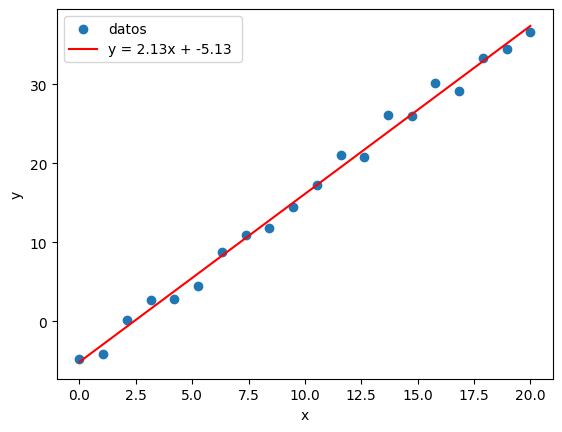

In [36]:
plt.scatter(x,y,label="datos")
plt.plot(x_s,y_s,color='r',label = f"y = {b:.3}x + {a:.3} ")
plt.xlabel("x")
plt.legend()
plt.ylabel("y")

**Ejercicio 3**

In [28]:
cuadratico="MinimosCuadratico.txt"
df_cuadratico = pd.read_csv(cuadratico, sep=" ", header=None)
x1=df_cuadratico[0]
y1=df_cuadratico[1]

In [29]:
n=2
sol=GetFit(x1,y1,n)

x_s1 = np.linspace(np.min(x),np.max(x),50)
y_s1= GetModel(x_s1,sol)
c=sol[0]
b=sol[1]
a=sol[2]
sol

array([1.22132054, 6.09075205, 2.9565874 ])

Text(0, 0.5, 'y')

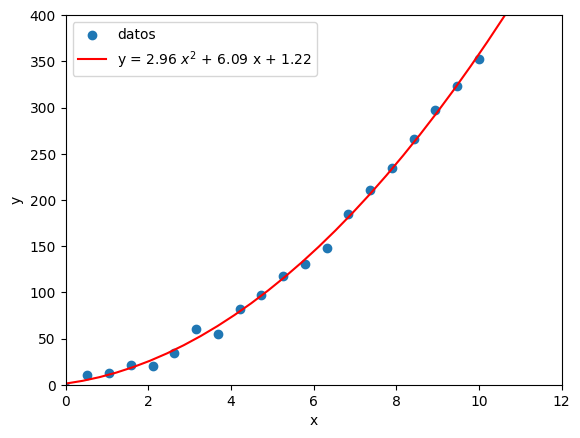

In [30]:
plt.scatter(x1,y1,label="datos")
plt.plot(x_s1,y_s1,color='r',label = f"y = {a:.3} $x^{2}$ + {b:.3} x + {c:.3}")
plt.xlabel("x")
plt.ylim(0, 400)
plt.xlim(0, 12)
plt.legend()
plt.ylabel("y")

**Ejercicio 4**

Para el ajuste lineal 

In [31]:
def linear_function(x, a, b):
    return a * x + b

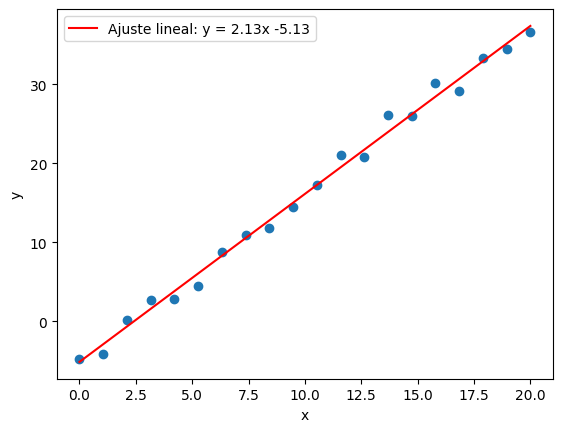

In [32]:
poptA, pcovA = curve_fit(linear_function, x, y)
Pred = linear_function(x, *poptA)

plt.plot(x,Pred,color="r",label=f'Ajuste lineal: y = {poptA[0]:.2f}x {poptA[1]:.2f}')
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


Para el ajuste cuadrático

In [33]:
def quadratic_function(X, a, b, c):
    return a * X**2 + b * X + c

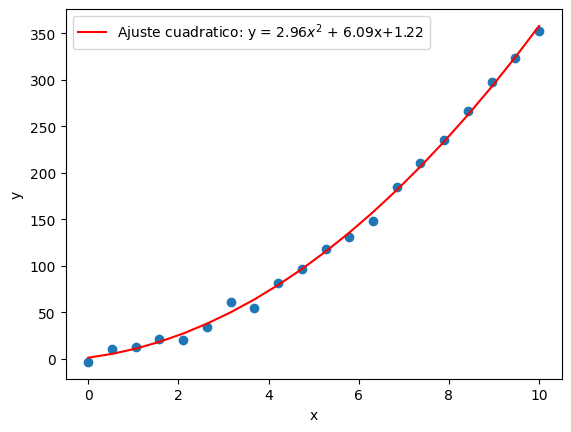

In [37]:
poptB, pcovB = curve_fit(quadratic_function, x1, y1)
PredB = quadratic_function(x1, *poptB)

a = poptB[0]
b = poptB[1]
c = poptB[2]

plt.plot(x1,PredB,color="r",label=f'Ajuste cuadratico: y = {a:.2f}$x^{2}$ + {b:.2f}x+{c:.2f}')
plt.scatter(x1,y1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()